# Text Mining & Image Recognition
## Laboratorio # 2
Héctor Alejandro Aragón
22001217

Problema #1:
Desarrolle una función que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.

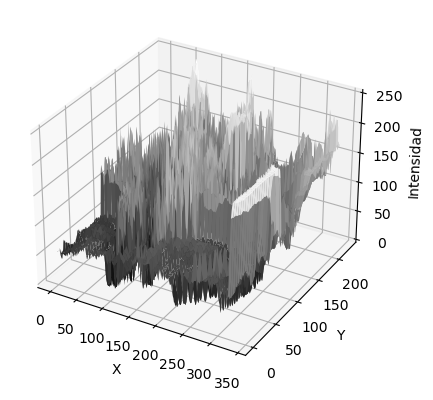

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_grayscale_image_3d(image):
    # Obtener las dimensiones de la imagen
    height, width = image.shape
    
    # Crear una malla de coordenadas para los ejes X e Y
    x = np.arange(0, width)
    y = np.arange(0, height)
    x, y = np.meshgrid(x, y)
    
    # Obtener los valores de intensidad de la imagen en un array
    z = image.flatten()
    
    # Crear una figura y un gráfico 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Graficar la superficie en 3D
    ax.plot_surface(x, y, z.reshape(image.shape), cmap='gray')
    
    # Configurar etiquetas de los ejes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Intensidad')
    
    # Mostrar el gráfico
    plt.show()

# Cargar una imagen en escala de grises (asegúrate de proporcionar la ruta correcta)
image_path = 'p2_g.jpg'
grayscale_image = plt.imread(image_path)

# Llamar a la función para mostrar la imagen en 3D
plot_grayscale_image_3d(grayscale_image)


Problema #2: Implemente una funci´on para cada una de las transformaciones vistas en clase: negativa, lineal, logarıtmica y exponencial.

C:\Users\halej\AppData\Local\Temp\ipykernel_23492\3691766364.py:14: RuntimeWarning: divide by zero encountered in log
  return (c * np.log(1 + image)).astype(np.uint8)
C:\Users\halej\AppData\Local\Temp\ipykernel_23492\3691766364.py:14: RuntimeWarning: invalid value encountered in cast
  return (c * np.log(1 + image)).astype(np.uint8)


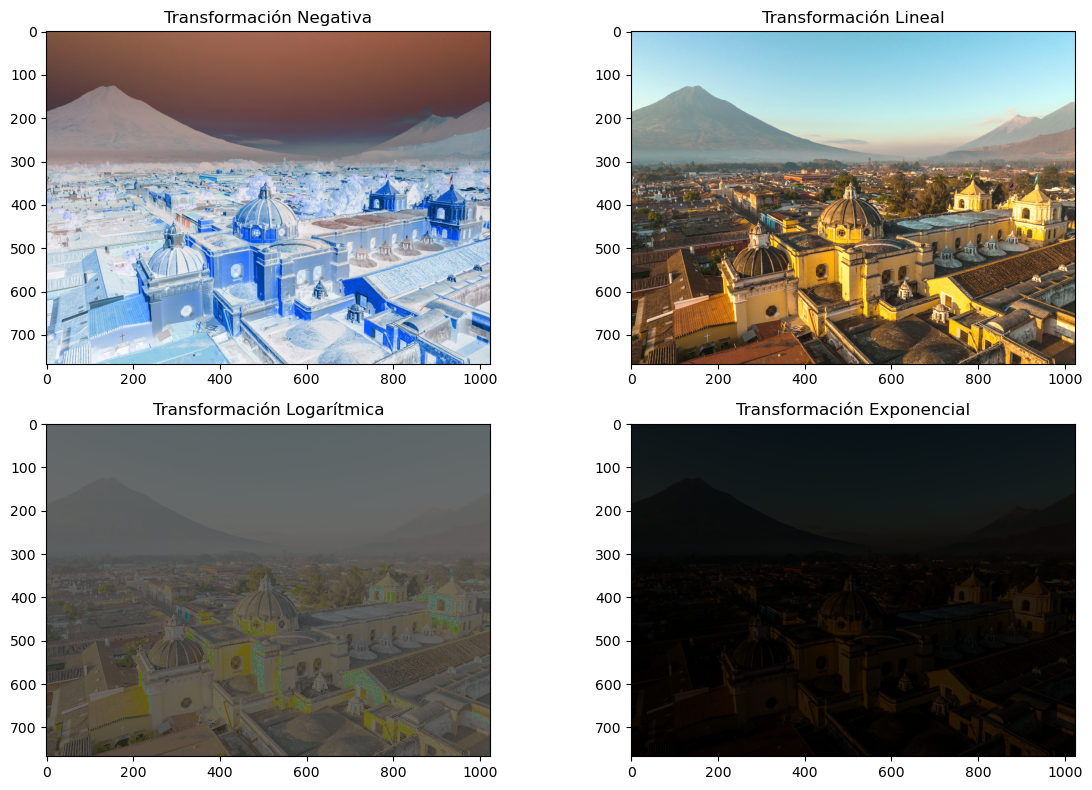

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Función para aplicar la transformación negativa
def negative_transform(image):
    return 255 - image

# Función para aplicar la transformación lineal
def linear_transform(image, slope, intercept):
    return np.clip(slope * image + intercept, 0, 255).astype(np.uint8)

# Función para aplicar la transformación logarítmica
def logarithmic_transform(image, c=1):
    return (c * np.log(1 + image)).astype(np.uint8)

# Función para aplicar la transformación exponencial
def exponential_transform(image, c=1, gamma=1):
    return (c * np.power(image, gamma)).astype(np.uint8)

# Cargar una imagen (asegúrate de proporcionar la ruta correcta)
image_path = 'p1.jpg'
image = plt.imread(image_path)

# Aplicar las transformaciones a la imagen
negative_image = negative_transform(image)
linear_image = linear_transform(image, slope=1.2, intercept=10)
logarithmic_image = logarithmic_transform(image, c=20)
exponential_image = exponential_transform(image, c=0.01, gamma=1.5)

# Mostrar las imágenes transformadas
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(negative_image, cmap='gray')
plt.title('Transformación Negativa')

plt.subplot(2, 2, 2)
plt.imshow(linear_image, cmap='gray')
plt.title('Transformación Lineal')

plt.subplot(2, 2, 3)
plt.imshow(logarithmic_image, cmap='gray')
plt.title('Transformación Logarítmica')

plt.subplot(2, 2, 4)
plt.imshow(exponential_image, cmap='gray')
plt.title('Transformación Exponencial')

plt.tight_layout()
plt.show()


Problema #3: Desarrolle una función que dada dos imagenes a color, realice las operaciones SUMA, RESTA, AND,OR , XOR con ambas imagenes recuerde que para realizar las operaciones lógicas es necesario pasar la imagen a escala de grises y luego binarizarla.

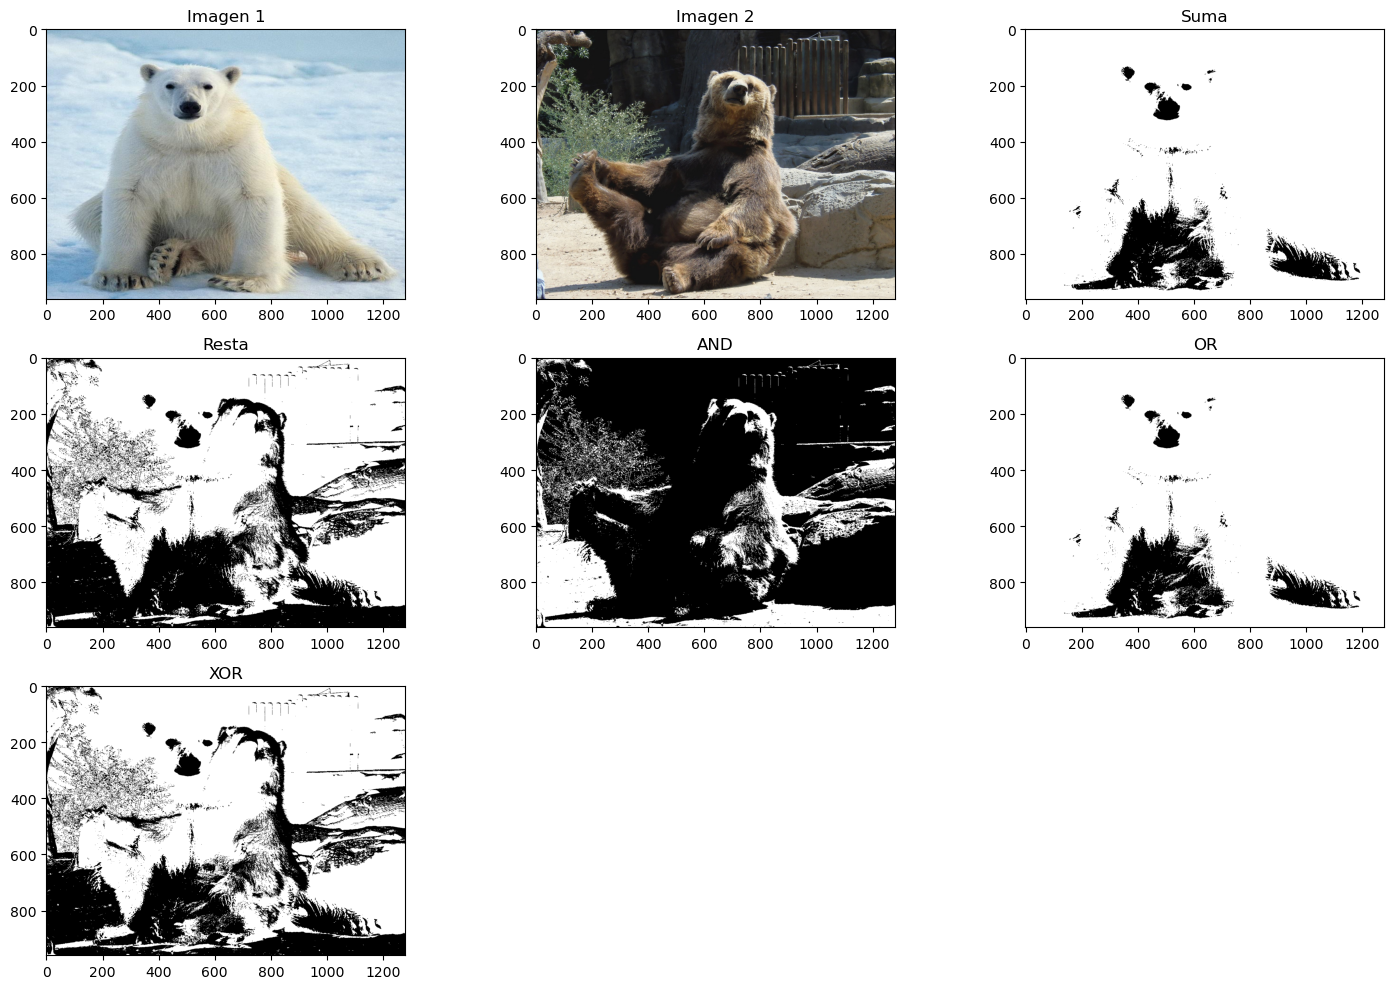

In [8]:
import cv2
import numpy as np

def perform_logical_operations(image1, image2):
    # Redimensionar las imágenes al mismo tamaño
    image1 = cv2.resize(image1, (image2.shape[1], image2.shape[0]))
    
    # Convertir imágenes a escala de grises
    gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    
    # Binarizar las imágenes
    _, binary_image1 = cv2.threshold(gray_image1, 128, 255, cv2.THRESH_BINARY)
    _, binary_image2 = cv2.threshold(gray_image2, 128, 255, cv2.THRESH_BINARY)
    
    # Realizar operaciones lógicas
    sum_result = cv2.add(binary_image1, binary_image2)
    subtract_result = cv2.subtract(binary_image1, binary_image2)
    and_result = cv2.bitwise_and(binary_image1, binary_image2)
    or_result = cv2.bitwise_or(binary_image1, binary_image2)
    xor_result = cv2.bitwise_xor(binary_image1, binary_image2)
    
    return sum_result, subtract_result, and_result, or_result, xor_result

# Cargar dos imágenes a color (asegúrate de proporcionar las rutas correctas)
image1_path = 'p5.jpg'
image2_path = 'p6.jpg'
image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

# Realizar operaciones lógicas
sum_result, subtract_result, and_result, or_result, xor_result = perform_logical_operations(image1, image2)

# Restaurar el tamaño original de las imágenes para mostrar los resultados
image1 = cv2.resize(image1, (sum_result.shape[1], sum_result.shape[0]))
image2 = cv2.resize(image2, (sum_result.shape[1], sum_result.shape[0]))

# Mostrar los resultados de las operaciones
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Imagen 1')

plt.subplot(3, 3, 2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('Imagen 2')

plt.subplot(3, 3, 3)
plt.imshow(sum_result, cmap='gray')
plt.title('Suma')

plt.subplot(3, 3, 4)
plt.imshow(subtract_result, cmap='gray')
plt.title('Resta')

plt.subplot(3, 3, 5)
plt.imshow(and_result, cmap='gray')
plt.title('AND')

plt.subplot(3, 3, 6)
plt.imshow(or_result, cmap='gray')
plt.title('OR')

plt.subplot(3, 3, 7)
plt.imshow(xor_result, cmap='gray')
plt.title('XOR')

plt.tight_layout()
plt.show()


Problema#4: Realice una comparacion entreel algoritmo de Canny, el operador de Sobel y el operador Laplaciano para encontrar los bordes en una imagen,para este ejercicio puede utilizar lasfuncione deopenCV ycualquie rimagen,como entregable debe mostrar unacomparación entre los tre senfoques con una tabla donde se muestre las ventajas y desventajas de cada enfoque.

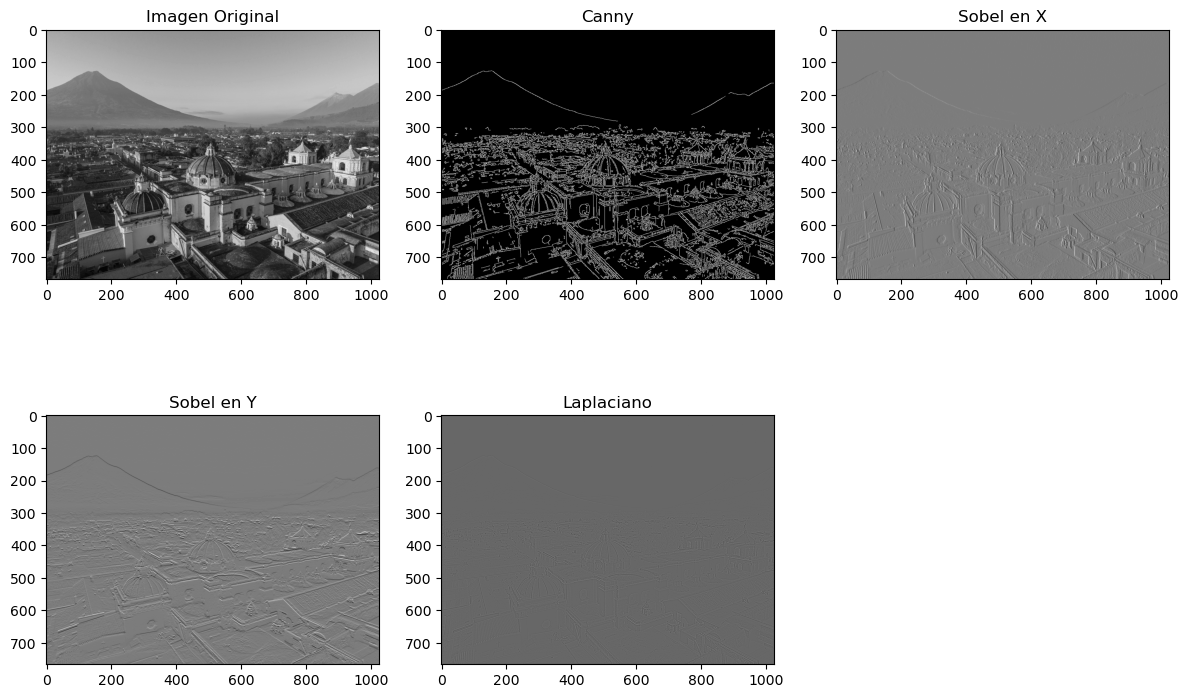

Tabla de Ventajas y Desventajas:
---------------------------------
Algoritmo    |   Ventajas   |   Desventajas
---------------------------------
Canny        |   Bordes bien definidos, 
             |   Pocos falsos positivos   |   Sensible al ruido
---------------------------------
Sobel        |   Simple, rápida   |   Sensible al ruido, 
             |   Detecta bordes claros  |   Puede perder bordes finos
---------------------------------
Laplaciano   |   Bueno para bordes finos   |   Sensible al ruido, 
             |   Detecta cambios de 
             |   dirección de borde     |   Detecta ruido como bordes
---------------------------------


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar una imagen (asegúrate de proporcionar la ruta correcta)
image_path = 'p1.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Aplicar los algoritmos de detección de bordes
canny_edges = cv2.Canny(image, 100, 200)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Crear una figura para mostrar los resultados
plt.figure(figsize=(12, 8))

# Mostrar la imagen original
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')

# Mostrar los bordes detectados por el algoritmo de Canny
plt.subplot(2, 3, 2)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny')

# Mostrar los bordes detectados por el operador Sobel en dirección X
plt.subplot(2, 3, 3)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel en X')

# Mostrar los bordes detectados por el operador Sobel en dirección Y
plt.subplot(2, 3, 4)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel en Y')

# Mostrar los bordes detectados por el operador Laplaciano
plt.subplot(2, 3, 5)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplaciano')

plt.tight_layout()
plt.show()

# Tabla de ventajas y desventajas
print("Tabla de Ventajas y Desventajas:")
print("---------------------------------")
print("Algoritmo    |   Ventajas   |   Desventajas")
print("---------------------------------")
print("Canny        |   Bordes bien definidos, \n             |   Pocos falsos positivos   |   Sensible al ruido")
print("---------------------------------")
print("Sobel        |   Simple, rápida   |   Sensible al ruido, \n             |   Detecta bordes claros  |   Puede perder bordes finos")
print("---------------------------------")
print("Laplaciano   |   Bueno para bordes finos   |   Sensible al ruido, \n             |   Detecta cambios de \n             |   dirección de borde     |   Detecta ruido como bordes")
print("---------------------------------")


Problema#5: Utilizando funciones de Open CV deber´a aplicar los filtros de  convoluci´on de tamaño de kernel(3x3, 5x5 y 7x7)las operaciones que deberá realizar son las siguientes: 

Kernel Gaussiano de ruiodo. 
Kernel Box de ruido. 
Kernel de mediana para ruido. 
Kernel Sobel para detecci´on de bordes(en X y Y). 
Kernel Lapaciano para detecci´on de bordes. 
Kernel de realce(Sharpening). 
Kernel de relieve(Embossing)


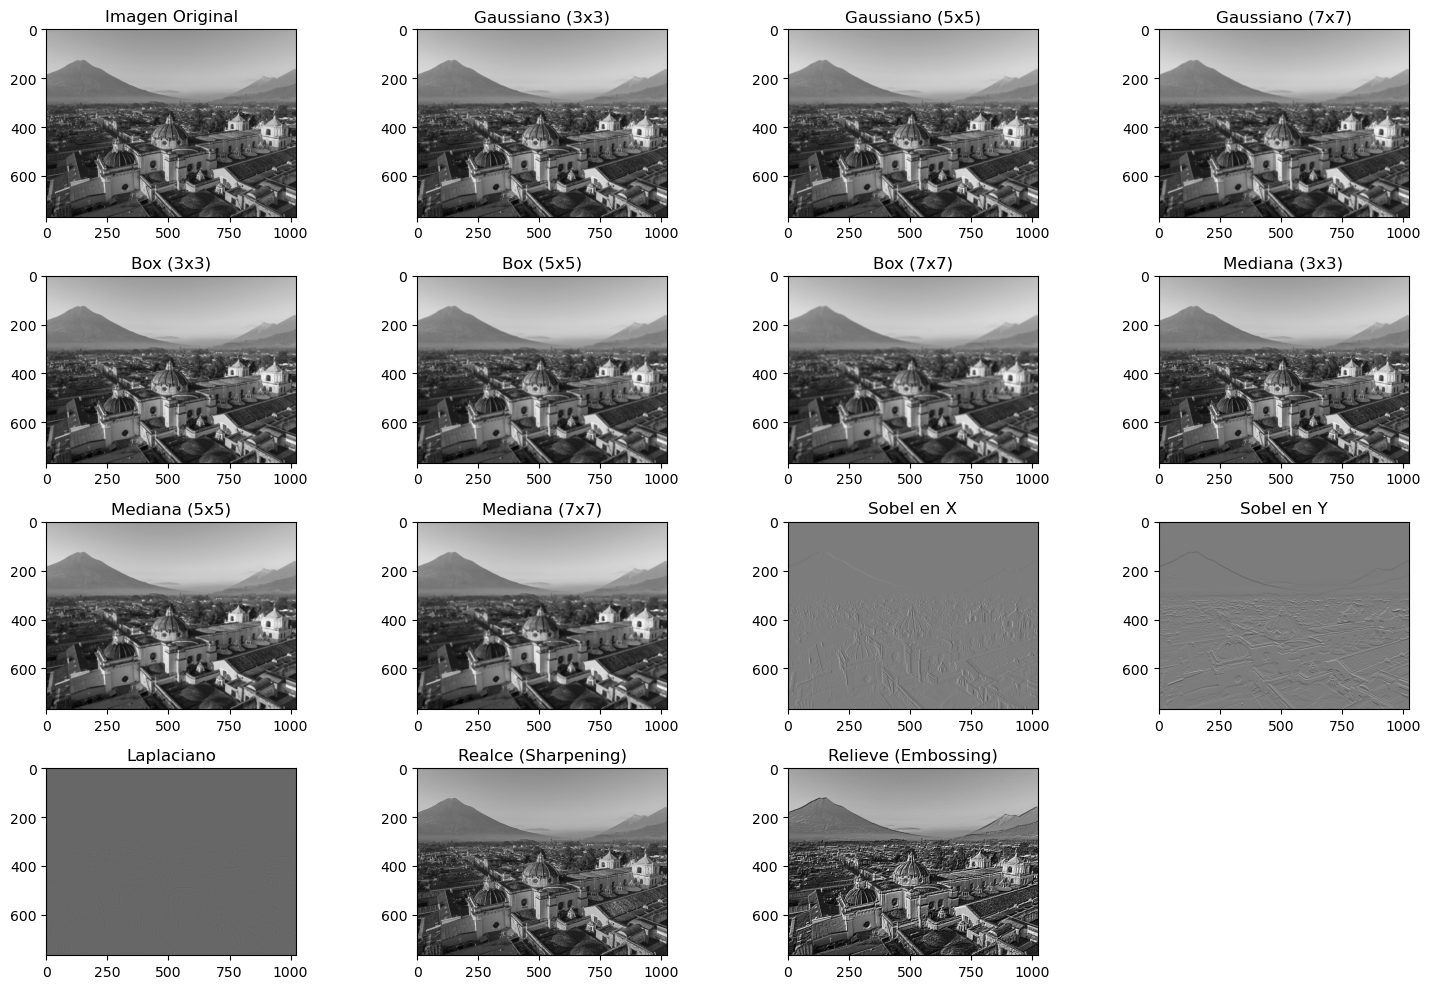

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar una imagen (asegúrate de proporcionar la ruta correcta)
image_path = 'p1.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Aplicar el filtro Gaussiano con diferentes tamaños de kernel
gaussian_3x3 = cv2.GaussianBlur(image, (3, 3), 0)
gaussian_5x5 = cv2.GaussianBlur(image, (5, 5), 0)
gaussian_7x7 = cv2.GaussianBlur(image, (7, 7), 0)

# Aplicar el filtro de caja (Box) con diferentes tamaños de kernel
box_3x3 = cv2.boxFilter(image, -1, (3, 3))
box_5x5 = cv2.boxFilter(image, -1, (5, 5))
box_7x7 = cv2.boxFilter(image, -1, (7, 7))

# Aplicar el filtro de mediana con diferentes tamaños de kernel
median_3x3 = cv2.medianBlur(image, 3)
median_5x5 = cv2.medianBlur(image, 5)
median_7x7 = cv2.medianBlur(image, 7)

# Kernel Sobel para detección de bordes en dirección X e Y
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Kernel Laplaciano para detección de bordes
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Kernel de realce (Sharpening)
sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])
sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)

# Kernel de relieve (Embossing)
embossing_kernel = np.array([[-2, -1, 0],
                             [-1, 1, 1],
                             [0, 1, 2]])
embossed_image = cv2.filter2D(image, -1, embossing_kernel)

# Crear una figura para mostrar los resultados
plt.figure(figsize=(15, 10))

# Mostrar la imagen original
plt.subplot(4, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')

# Mostrar los resultados de los filtros Gaussianos
plt.subplot(4, 4, 2)
plt.imshow(gaussian_3x3, cmap='gray')
plt.title('Gaussiano (3x3)')

plt.subplot(4, 4, 3)
plt.imshow(gaussian_5x5, cmap='gray')
plt.title('Gaussiano (5x5)')

plt.subplot(4, 4, 4)
plt.imshow(gaussian_7x7, cmap='gray')
plt.title('Gaussiano (7x7)')

# Mostrar los resultados de los filtros de caja (Box)
plt.subplot(4, 4, 5)
plt.imshow(box_3x3, cmap='gray')
plt.title('Box (3x3)')

plt.subplot(4, 4, 6)
plt.imshow(box_5x5, cmap='gray')
plt.title('Box (5x5)')

plt.subplot(4, 4, 7)
plt.imshow(box_7x7, cmap='gray')
plt.title('Box (7x7)')

# Mostrar los resultados de los filtros de mediana
plt.subplot(4, 4, 8)
plt.imshow(median_3x3, cmap='gray')
plt.title('Mediana (3x3)')

plt.subplot(4, 4, 9)
plt.imshow(median_5x5, cmap='gray')
plt.title('Mediana (5x5)')

plt.subplot(4, 4, 10)
plt.imshow(median_7x7, cmap='gray')
plt.title('Mediana (7x7)')

# Mostrar los resultados de los filtros Sobel
plt.subplot(4, 4, 11)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel en X')

plt.subplot(4, 4, 12)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel en Y')

# Mostrar el resultado del filtro Laplaciano
plt.subplot(4, 4, 13)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplaciano')

# Mostrar los resultados de los filtros de realce y relieve
plt.subplot(4, 4, 14)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Realce (Sharpening)')

plt.subplot(4, 4, 15)
plt.imshow(embossed_image, cmap='gray')
plt.title('Relieve (Embossing)')

plt.tight_layout()
plt.show()
